In [ ]:
# Import required libraries
import numpy as np
import pandas as pd
from google.colab import files


uploaded = files.upload()


# Import the dataset
dataset = pd.read_csv('Phase(2).csv')

# Glance at the first five records
dataset.head()

# Print all the features of the data
dataset.columns


Saving Phase(2).csv to Phase(2) (1).csv


Index(['State', 'Account length', 'Area code', 'International plan',
       'Voice mail plan', 'Number vmail messages', 'Total day minutes',
       'Total eve calls', 'Total eve charge', 'Total night minutes',
       'Total day calls', 'Total day charge', 'Total eve minutes',
       'Total night calls', 'Total night charge', 'Total intl minutes',
       'Total intl calls', 'Total intl charge', 'Customer service calls',
       'Churn'],
      dtype='object')

Code : To find the number of churners and non-churners in the dataset:

In [ ]:
# Churners vs Non-Churners
dataset['Churn'].value_counts()


,count
Churn,
No,10
Yes,5


Code: To group data by Churn and compute the mean to find out if churners make more customer service calls than non-churners:

In [ ]:
# Group data by 'Churn' and compute the mean
print(dataset.groupby('Churn')['Customer service calls'].mean())


Churn
No     0.9
Yes    2.4
Name: Customer service calls, dtype: float64


Code: To find out if one State has more churners compared to another.

In [ ]:
# Count the number of churners and non-churners by State
print(dataset.groupby('State')['Churn'].value_counts())


State  Churn
AZ     No       1
CA     No       1
FL     No       1
GA     No       1
IL     No       1
MA     Yes      1
MI     Yes      1
NC     No       1
NV     No       1
NY     Yes      1
OH     No       1
OR     No       1
PA     Yes      1
TX     No       1
WA     Yes      1
Name: count, dtype: int64


Exploring Data Visualizations : To understand how variables are distributed

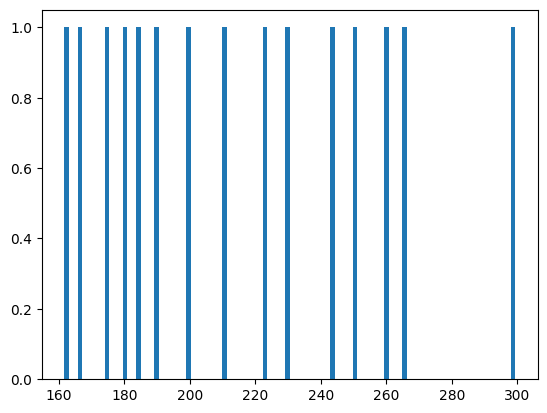

In [ ]:
# Import matplotlib and seaborn
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize the distribution of 'Total day minutes'
plt.hist(dataset['Total day minutes'], bins = 100)

# Display the plot
plt.show()


Code: To visualize the difference in Customer service calls between churners and non-churners

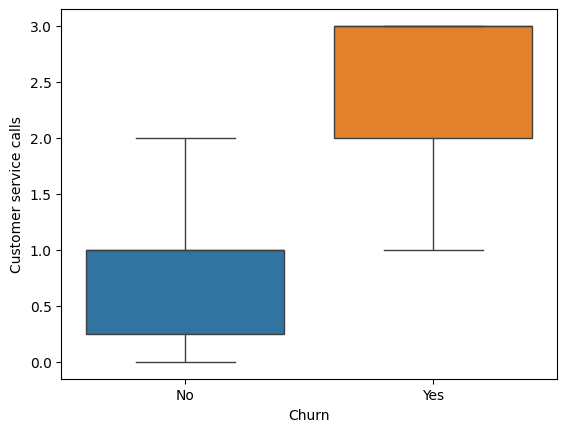

In [ ]:
# Create the box plot
sns.boxplot(x = 'Churn',
			y = 'Customer service calls',
			data = dataset,
			# sym = "",	Remove or replace sym with flierprops for customization
			hue = "International plan",
            flierprops={'marker': ''}) # This will hide the outliers. You can change the marker style if needed.
# Display the plot
plt.show()

In telco churn data, Churn, Voice mail plan, and, International plan, in particular, are binary features that can easily be converted into 0’s and 1’s.

In [ ]:
# Features and Labels
X = dataset.iloc[:, 0:19].values
y = dataset.iloc[:, 19].values # Churn

# Encoding categorical data in X
from sklearn.preprocessing import LabelEncoder

labelencoder_X_1 = LabelEncoder()
X[:, 3] = labelencoder_X_1.fit_transform(X[:, 3])

labelencoder_X_2 = LabelEncoder()
X[:, 4] = labelencoder_X_2.fit_transform(X[:, 4])

# Encoding categorical data in y
labelencoder_y = LabelEncoder()
y = labelencoder_y.fit_transform(y)


Code: Encoding State feature using One hot encoding

In [ ]:
# Removing extra column to avoid dummy variable trap
X_State = pd.get_dummies(X[:, 0], drop_first = True)

# Converting X to a dataframe
X = pd.DataFrame(X)

# Dropping the 'State' column
X = X.drop([0], axis = 1)

# Merging two dataframes
frames = [X_State, X]
result = pd.concat(frames, axis = 1, ignore_index = True)

# Final dataset with all numeric features
X = result


Code : To Create Training and Test sets

In [ ]:
# Splitting the dataset into the Training and Test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,
													test_size = 0.2,
													random_state = 0)


Code: To scale features of the training and test sets

In [ ]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


Code: To train a Random Forest classifier model on the training set.

In [ ]:
# Import RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier

# Instantiate the classifier
clf = RandomForestClassifier()

# Fit to the training data
clf.fit(X_train, y_train)


RandomForestClassifier()

Code : Making Predictions

In [ ]:
# Predict the labels for the test set
y_pred = clf.predict(X_test)


Code: Evaluating Model Performance

In [ ]:
# Compute accuracy
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)


1.0

Code : Confusion Matrix

In [ ]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred))


[[2 0]
 [0 1]]
